Exploring Material Parameterization

In [1]:
from qd.cae.dyna import D3plot
from importlib import reload

import Utils
import EdaTools

# get jupyter to use more of my screen space
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
# improve inline plots
%matplotlib notebook

# import the representative D3plot data

In [3]:
path = "/media/martin/Stuff/research/MaterailModels/MM003/"
file = "MM003_job01.d3plot"

result_d3plot = D3plot(path + file, read_states="disp")

# Extract surface nodes

In [4]:
reload(Utils)

surface_node_extractor = Utils.SurfaceNodeIds(threshold=20)
node_ids_surface = surface_node_extractor.fit_transform(result_d3plot)
print(node_ids_surface)

node_list = list(node_ids_surface)

<generator object SurfaceNodeIds.transform at 0x7ff2d7f99a98>


## plot the initial geometry

<IPython.core.display.Javascript object>


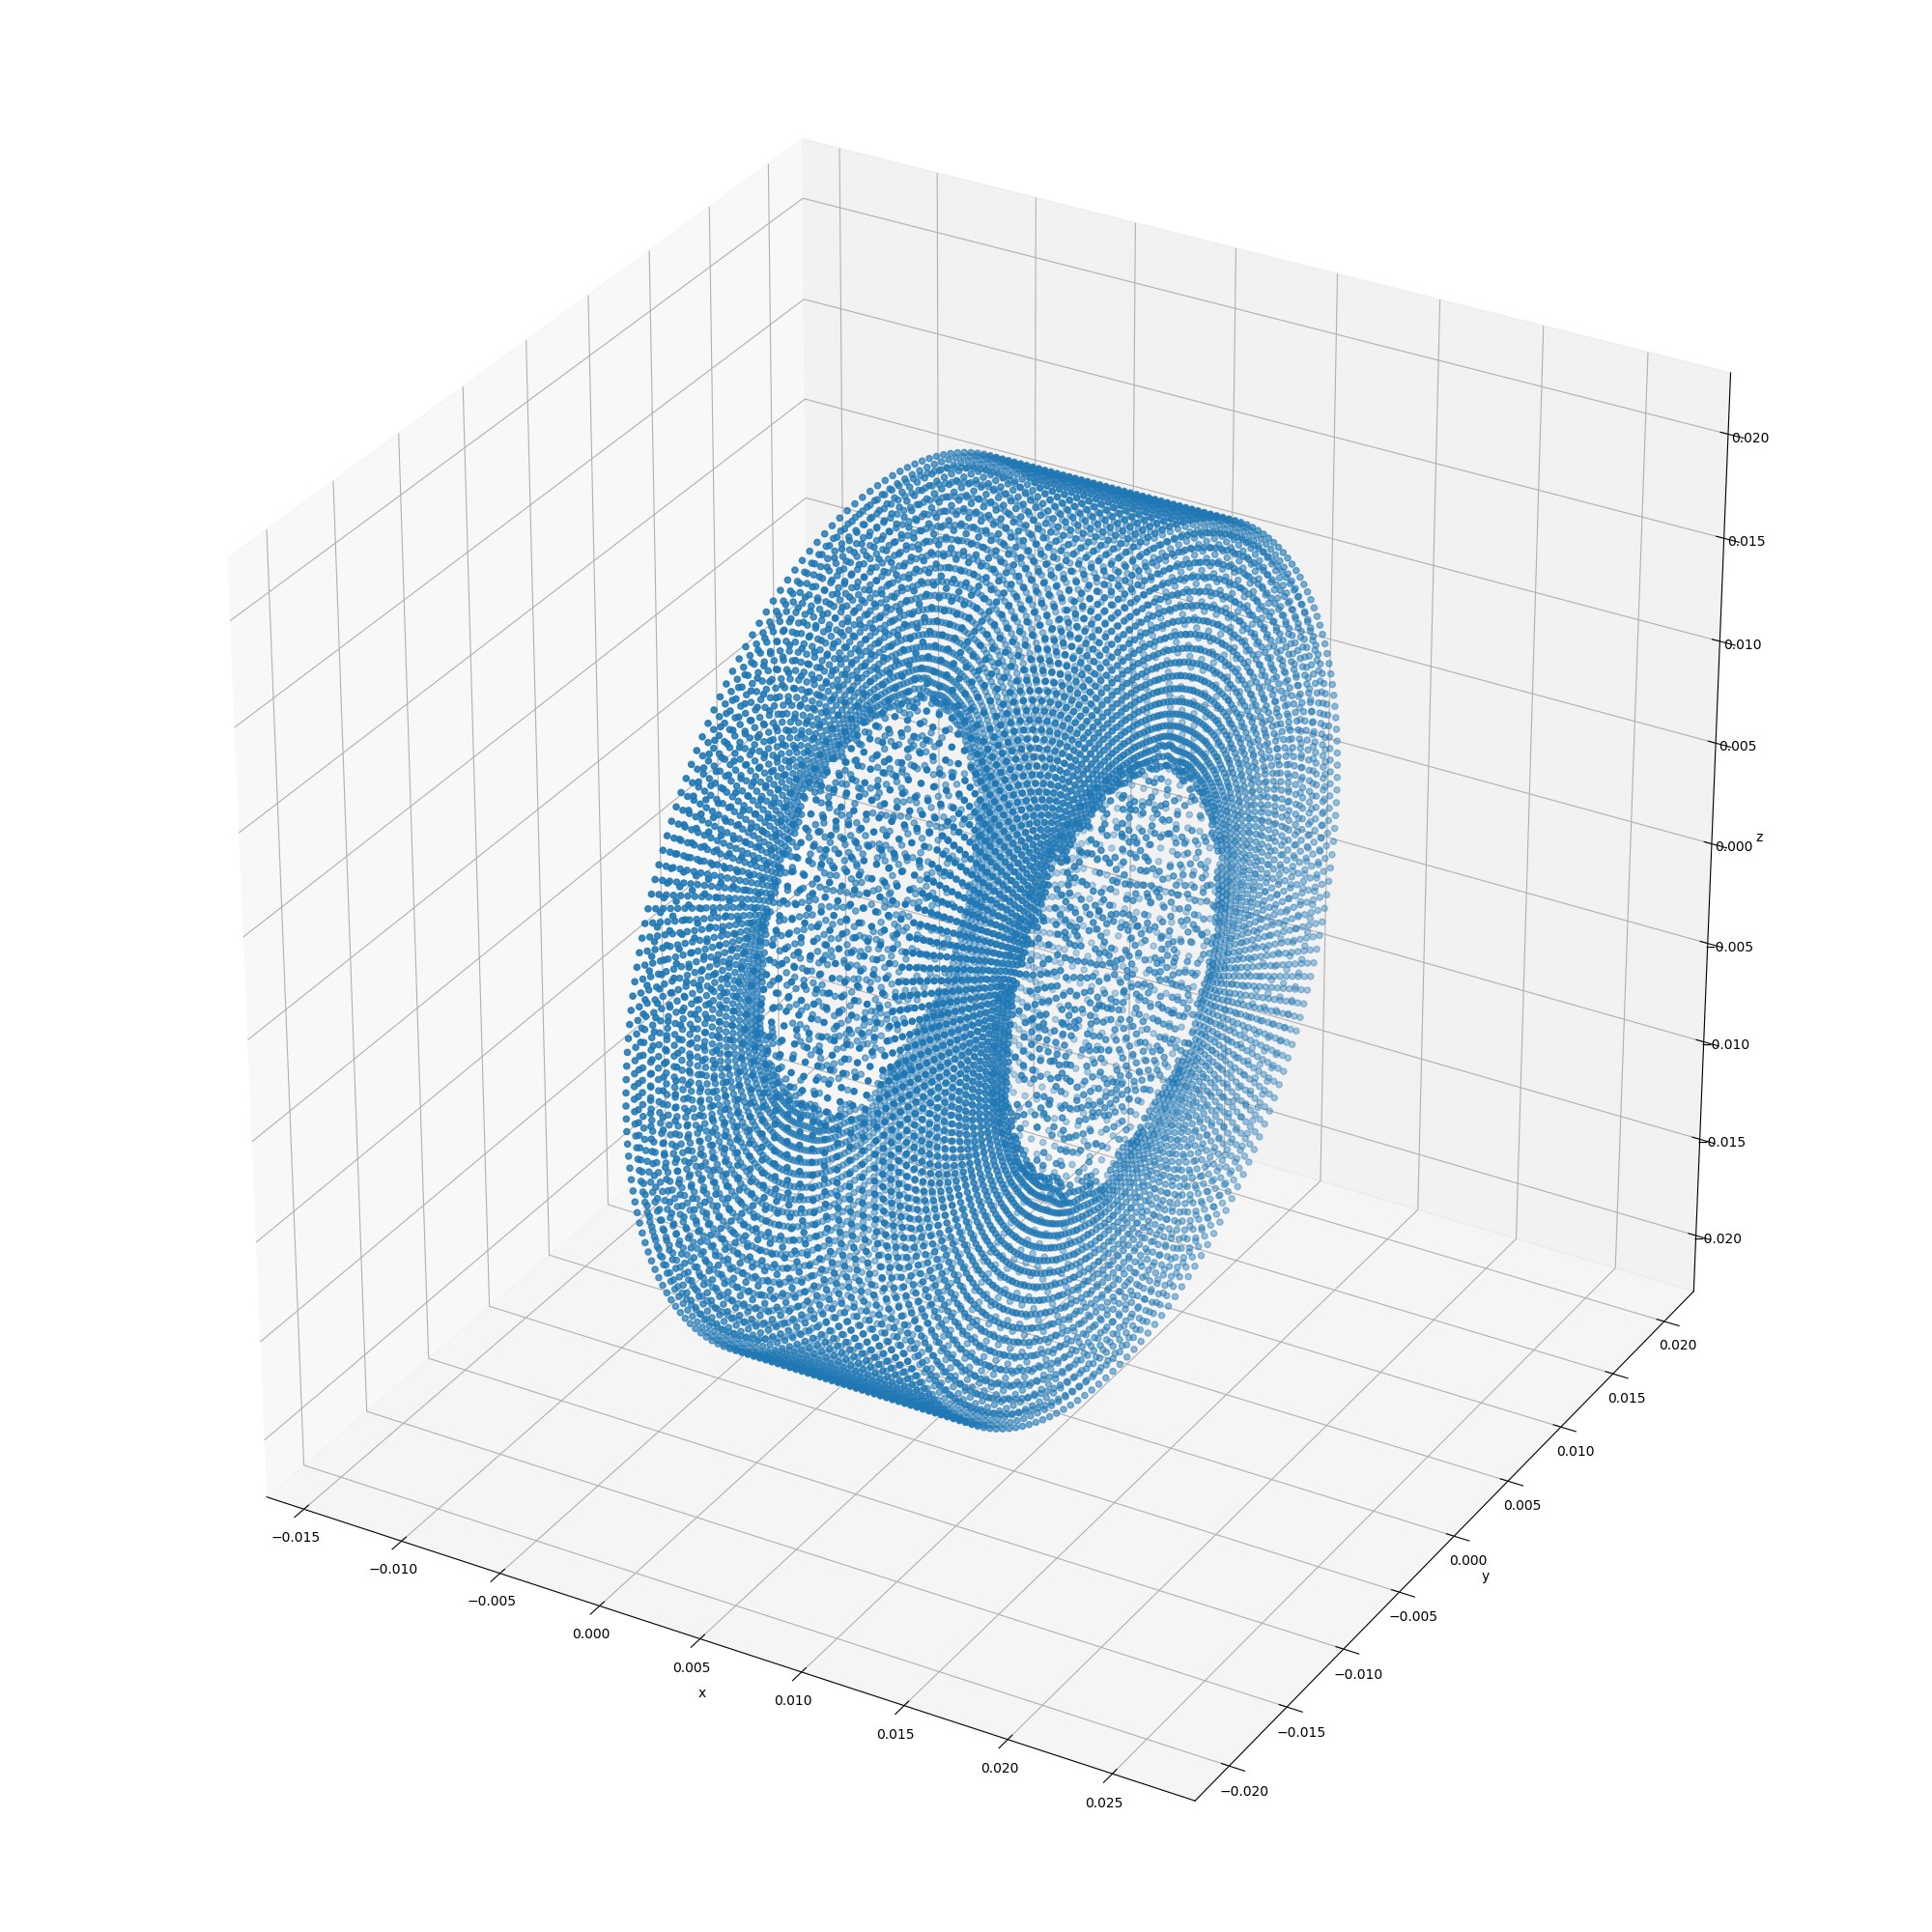

In [12]:
reload(Utils)
reload(EdaTools)

EdaTools.plot_3d(
    Utils.nodes_to_coord_array(
        result_d3plot.get_nodeByID(
            node_list)))

## plot the final geometry

<IPython.core.display.Javascript object>


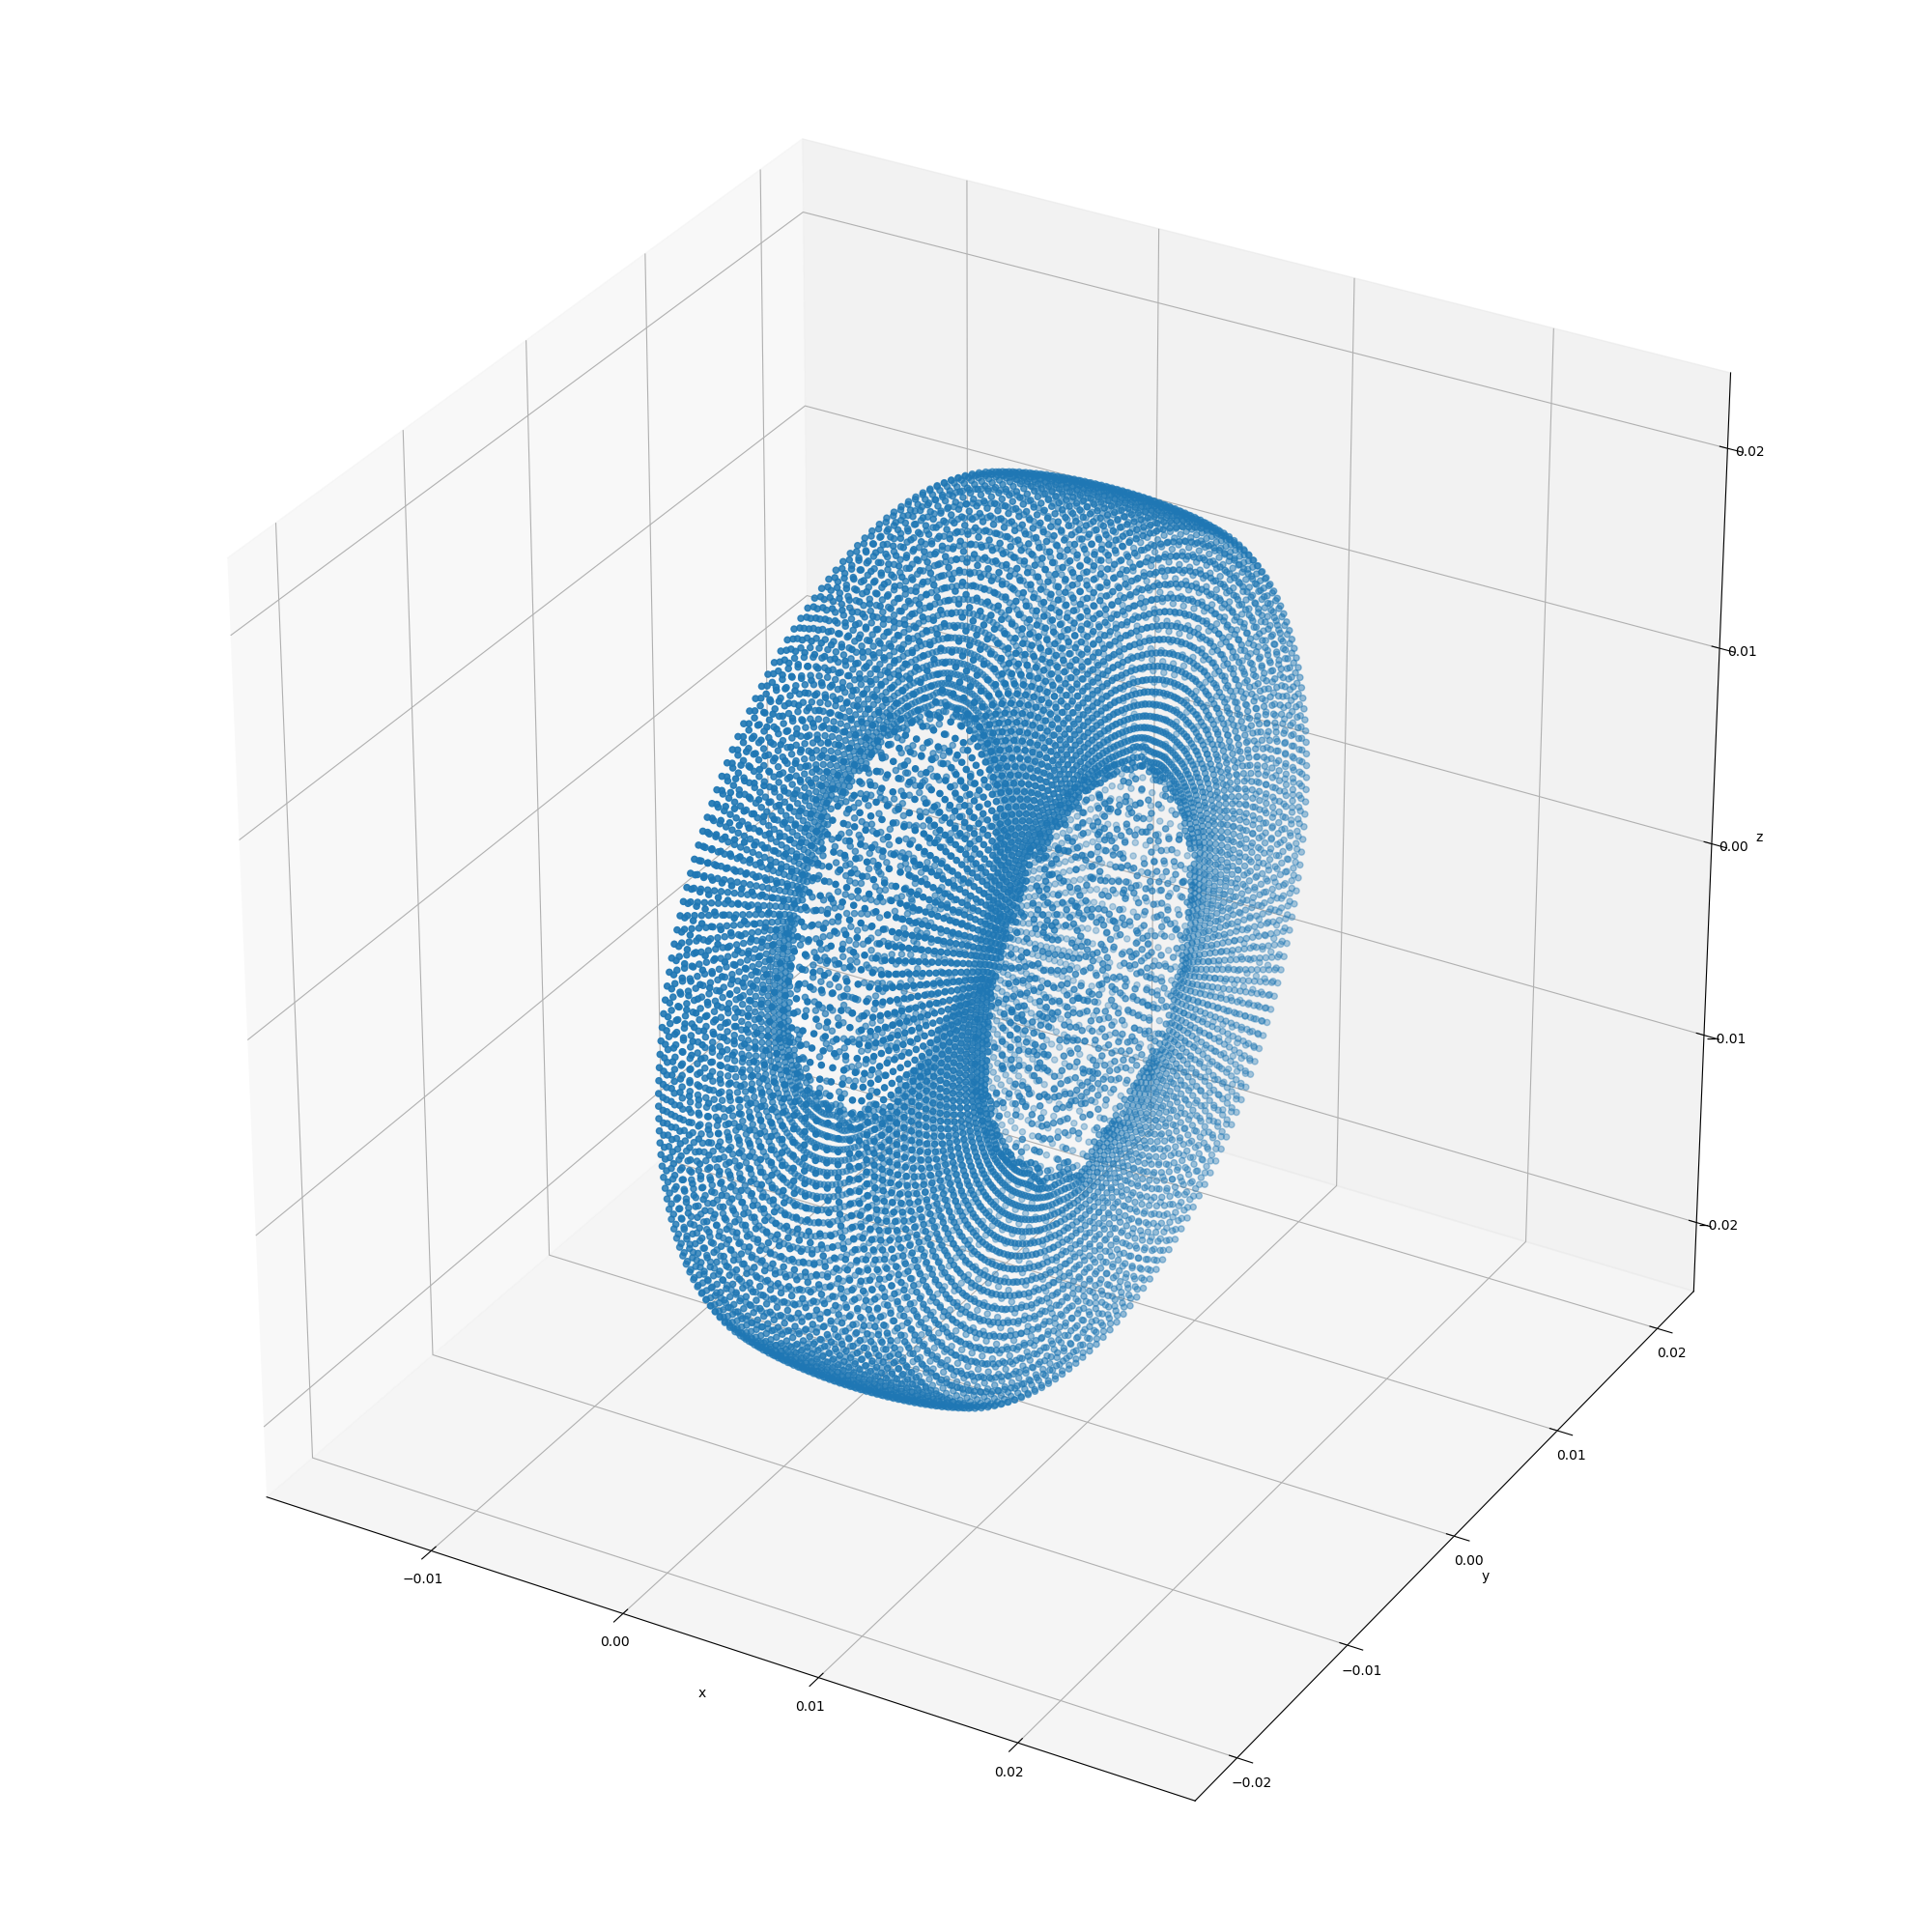

In [14]:
reload(Utils)
reload(EdaTools)

EdaTools.plot_3d(
    Utils.nodes_to_coord_array(
        result_d3plot.get_nodeByID(node_list), timestep=-1))

## plot displacement vectors

<IPython.core.display.Javascript object>


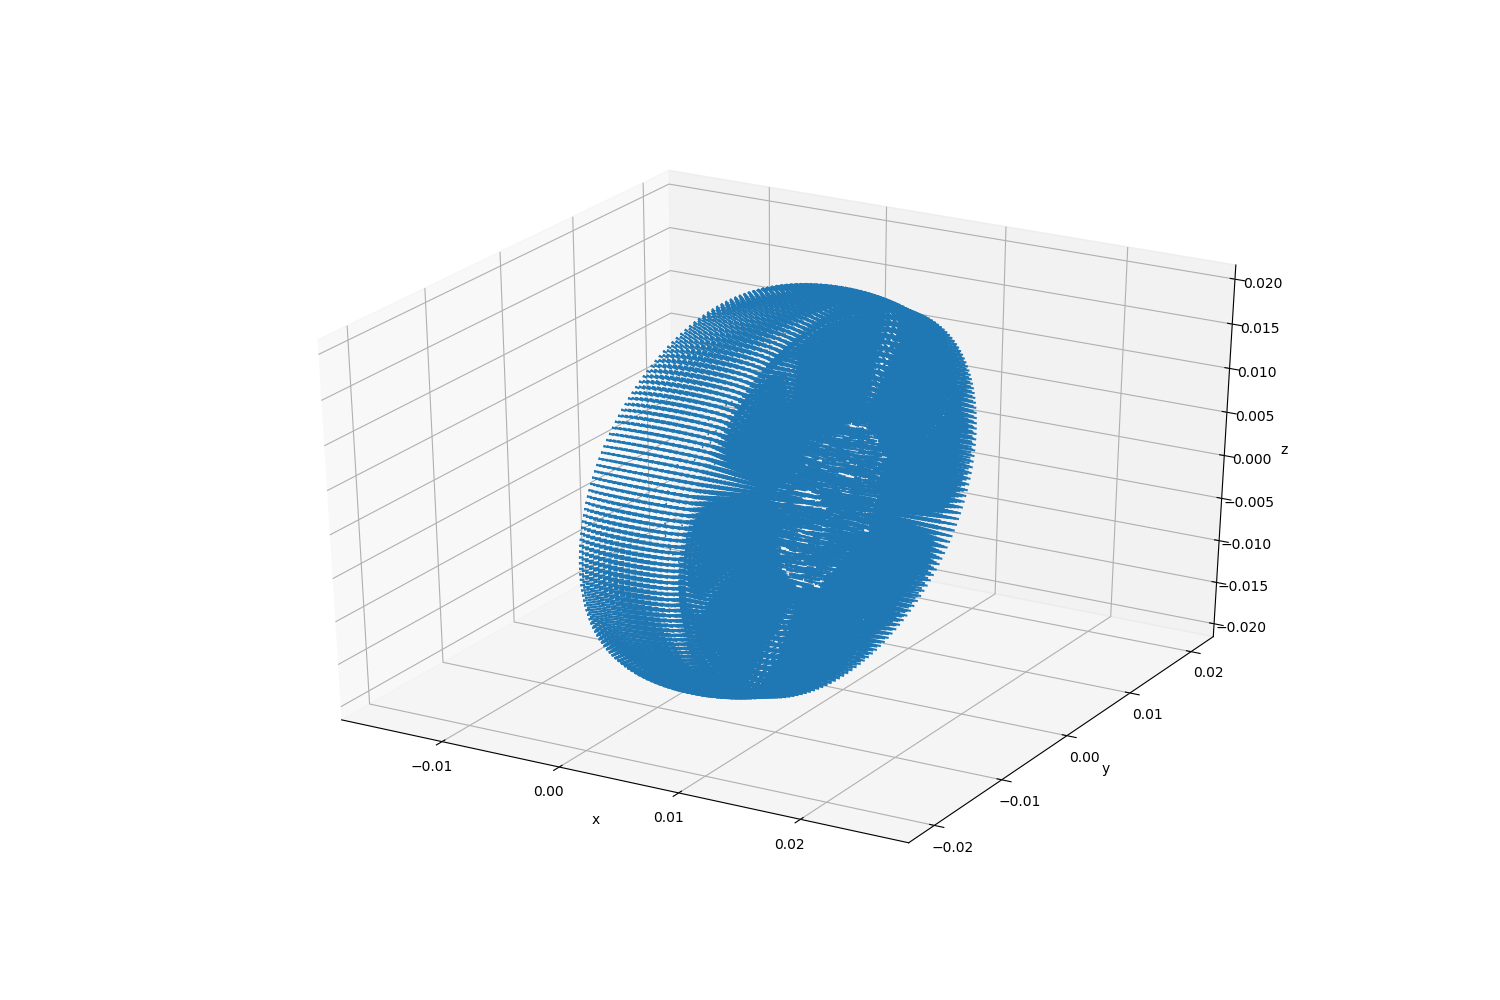

In [15]:
reload(Utils)
reload(EdaTools)

EdaTools.plot_disp_quiver(result_d3plot, node_list=node_list)

# Analyze Nodal properties

<IPython.core.display.Javascript object>


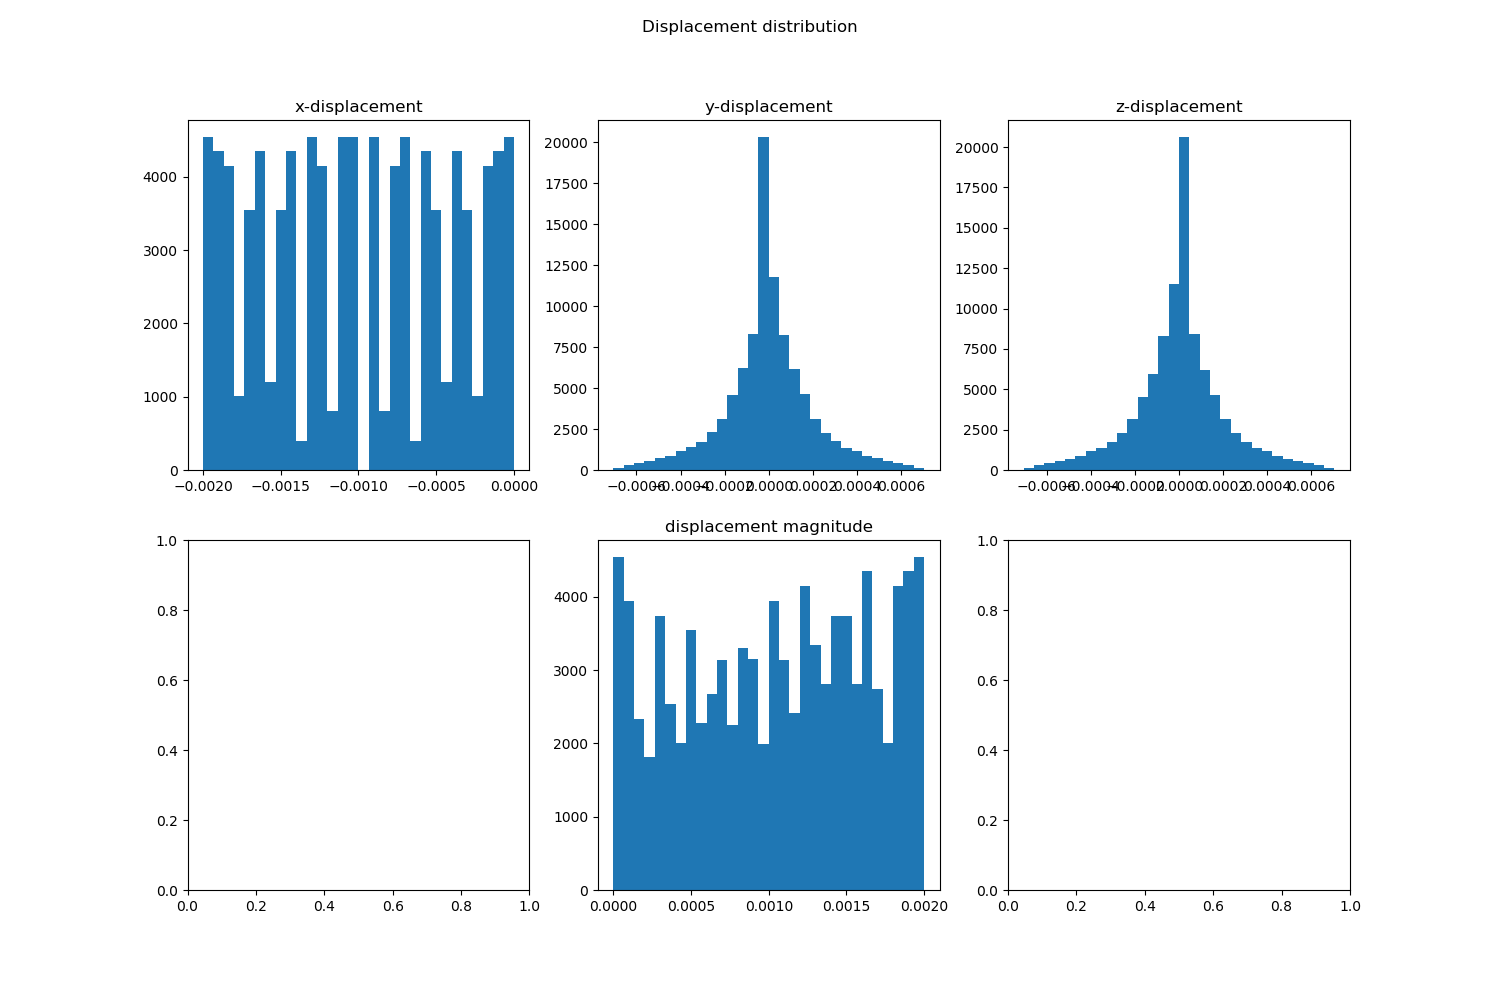

In [17]:
reload(Utils)
reload(EdaTools)

EdaTools.plot_disp_hist(result_d3plot, time_step=-1, num_bins=30)

# Analyze element properties

## Element Stress distribution

<IPython.core.display.Javascript object>


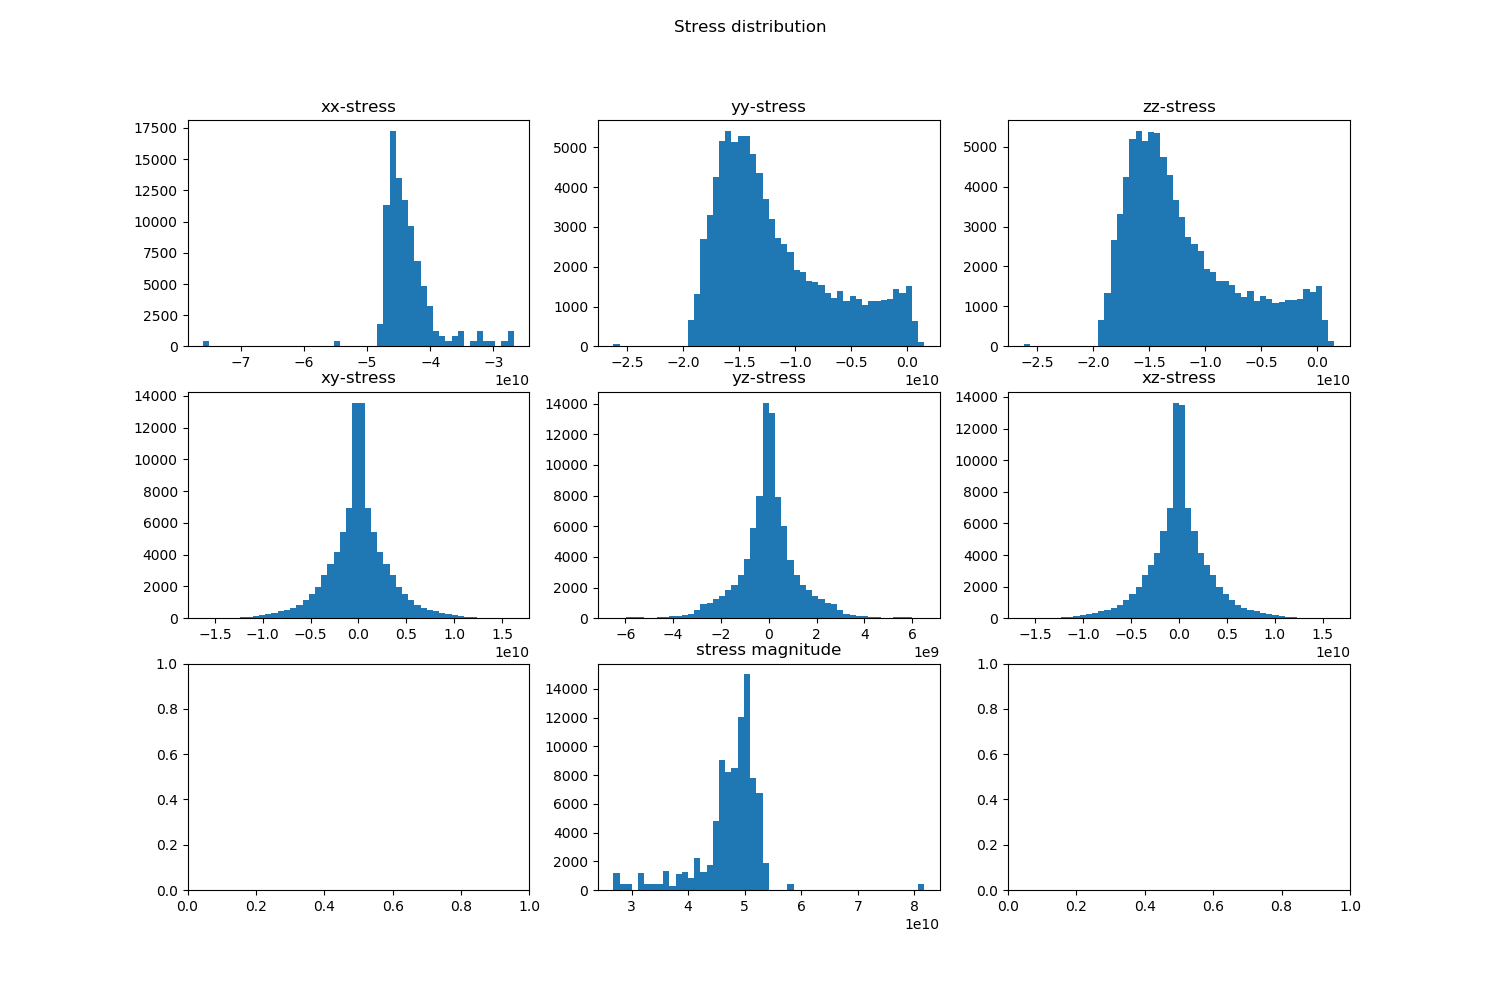

In [18]:
reload(Utils)
reload(EdaTools)

EdaTools.plot_stress_hist(result_d3plot, time_step=-1, num_bins=50)

## Element strain distribution

<IPython.core.display.Javascript object>


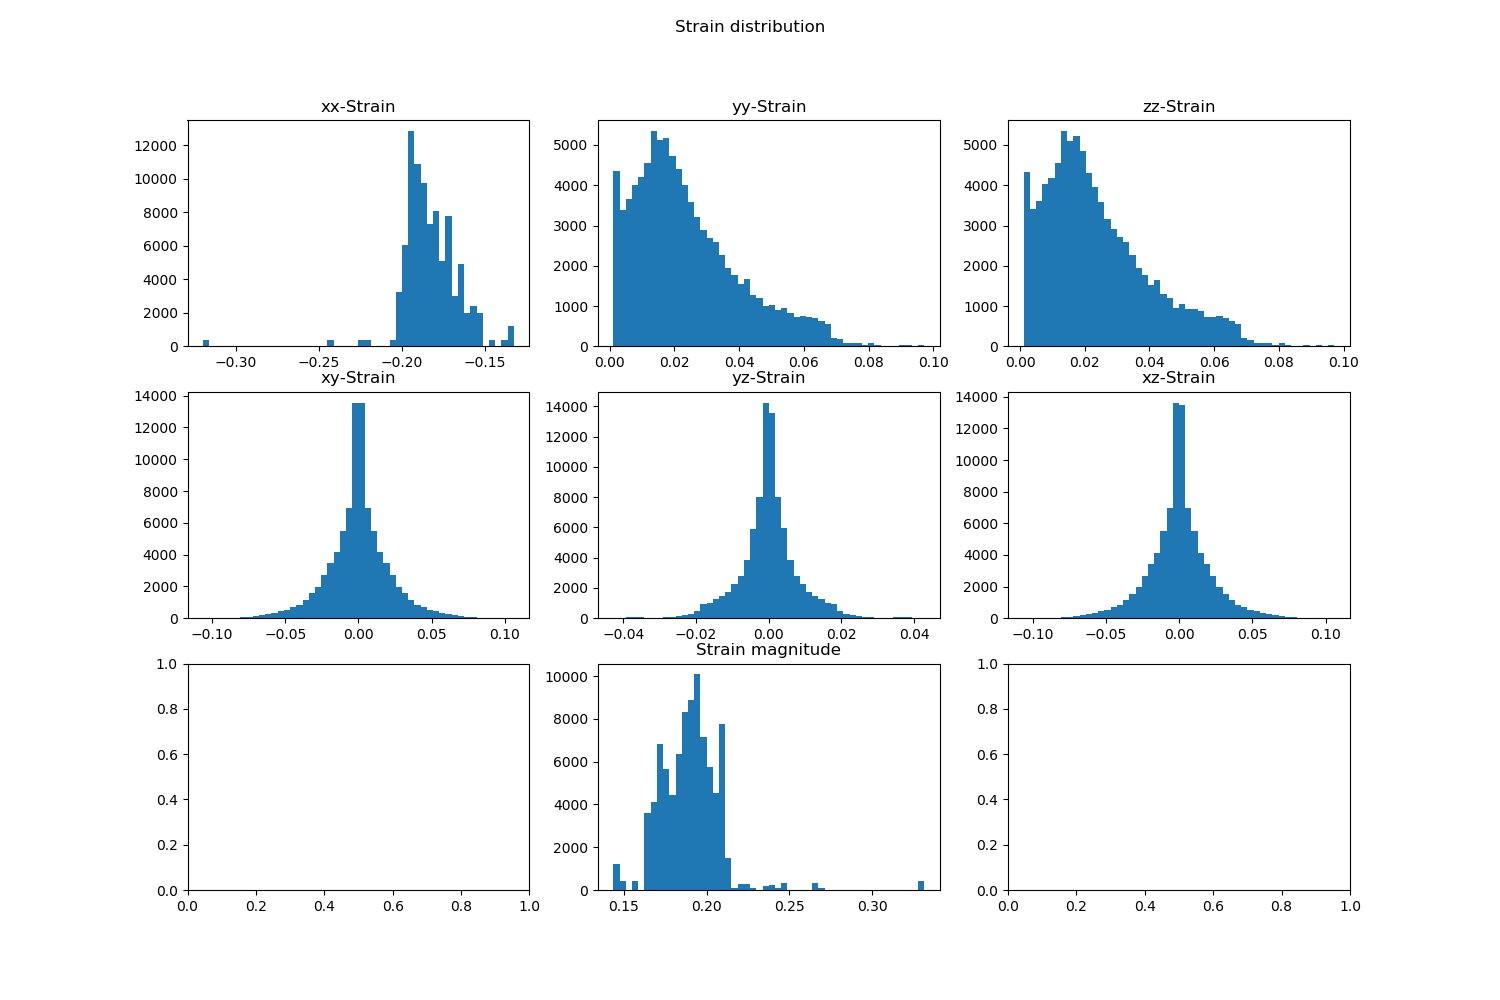

In [19]:
reload(Utils)
reload(EdaTools)

EdaTools.plot_strain_hist(result_d3plot, time_step=-1, num_bins=50)

# Extract 'experimental DIC' results from the HD FEM
Extract a portion of the surface nodes to be tracked as if they are DIC data.

In [68]:
reload(Utils)
reload(EdaTools)

nodes_dic = Utils.extract_observed_surface(result_d3plot, time_step=0, eps=0.0002)



<IPython.core.display.Javascript object>


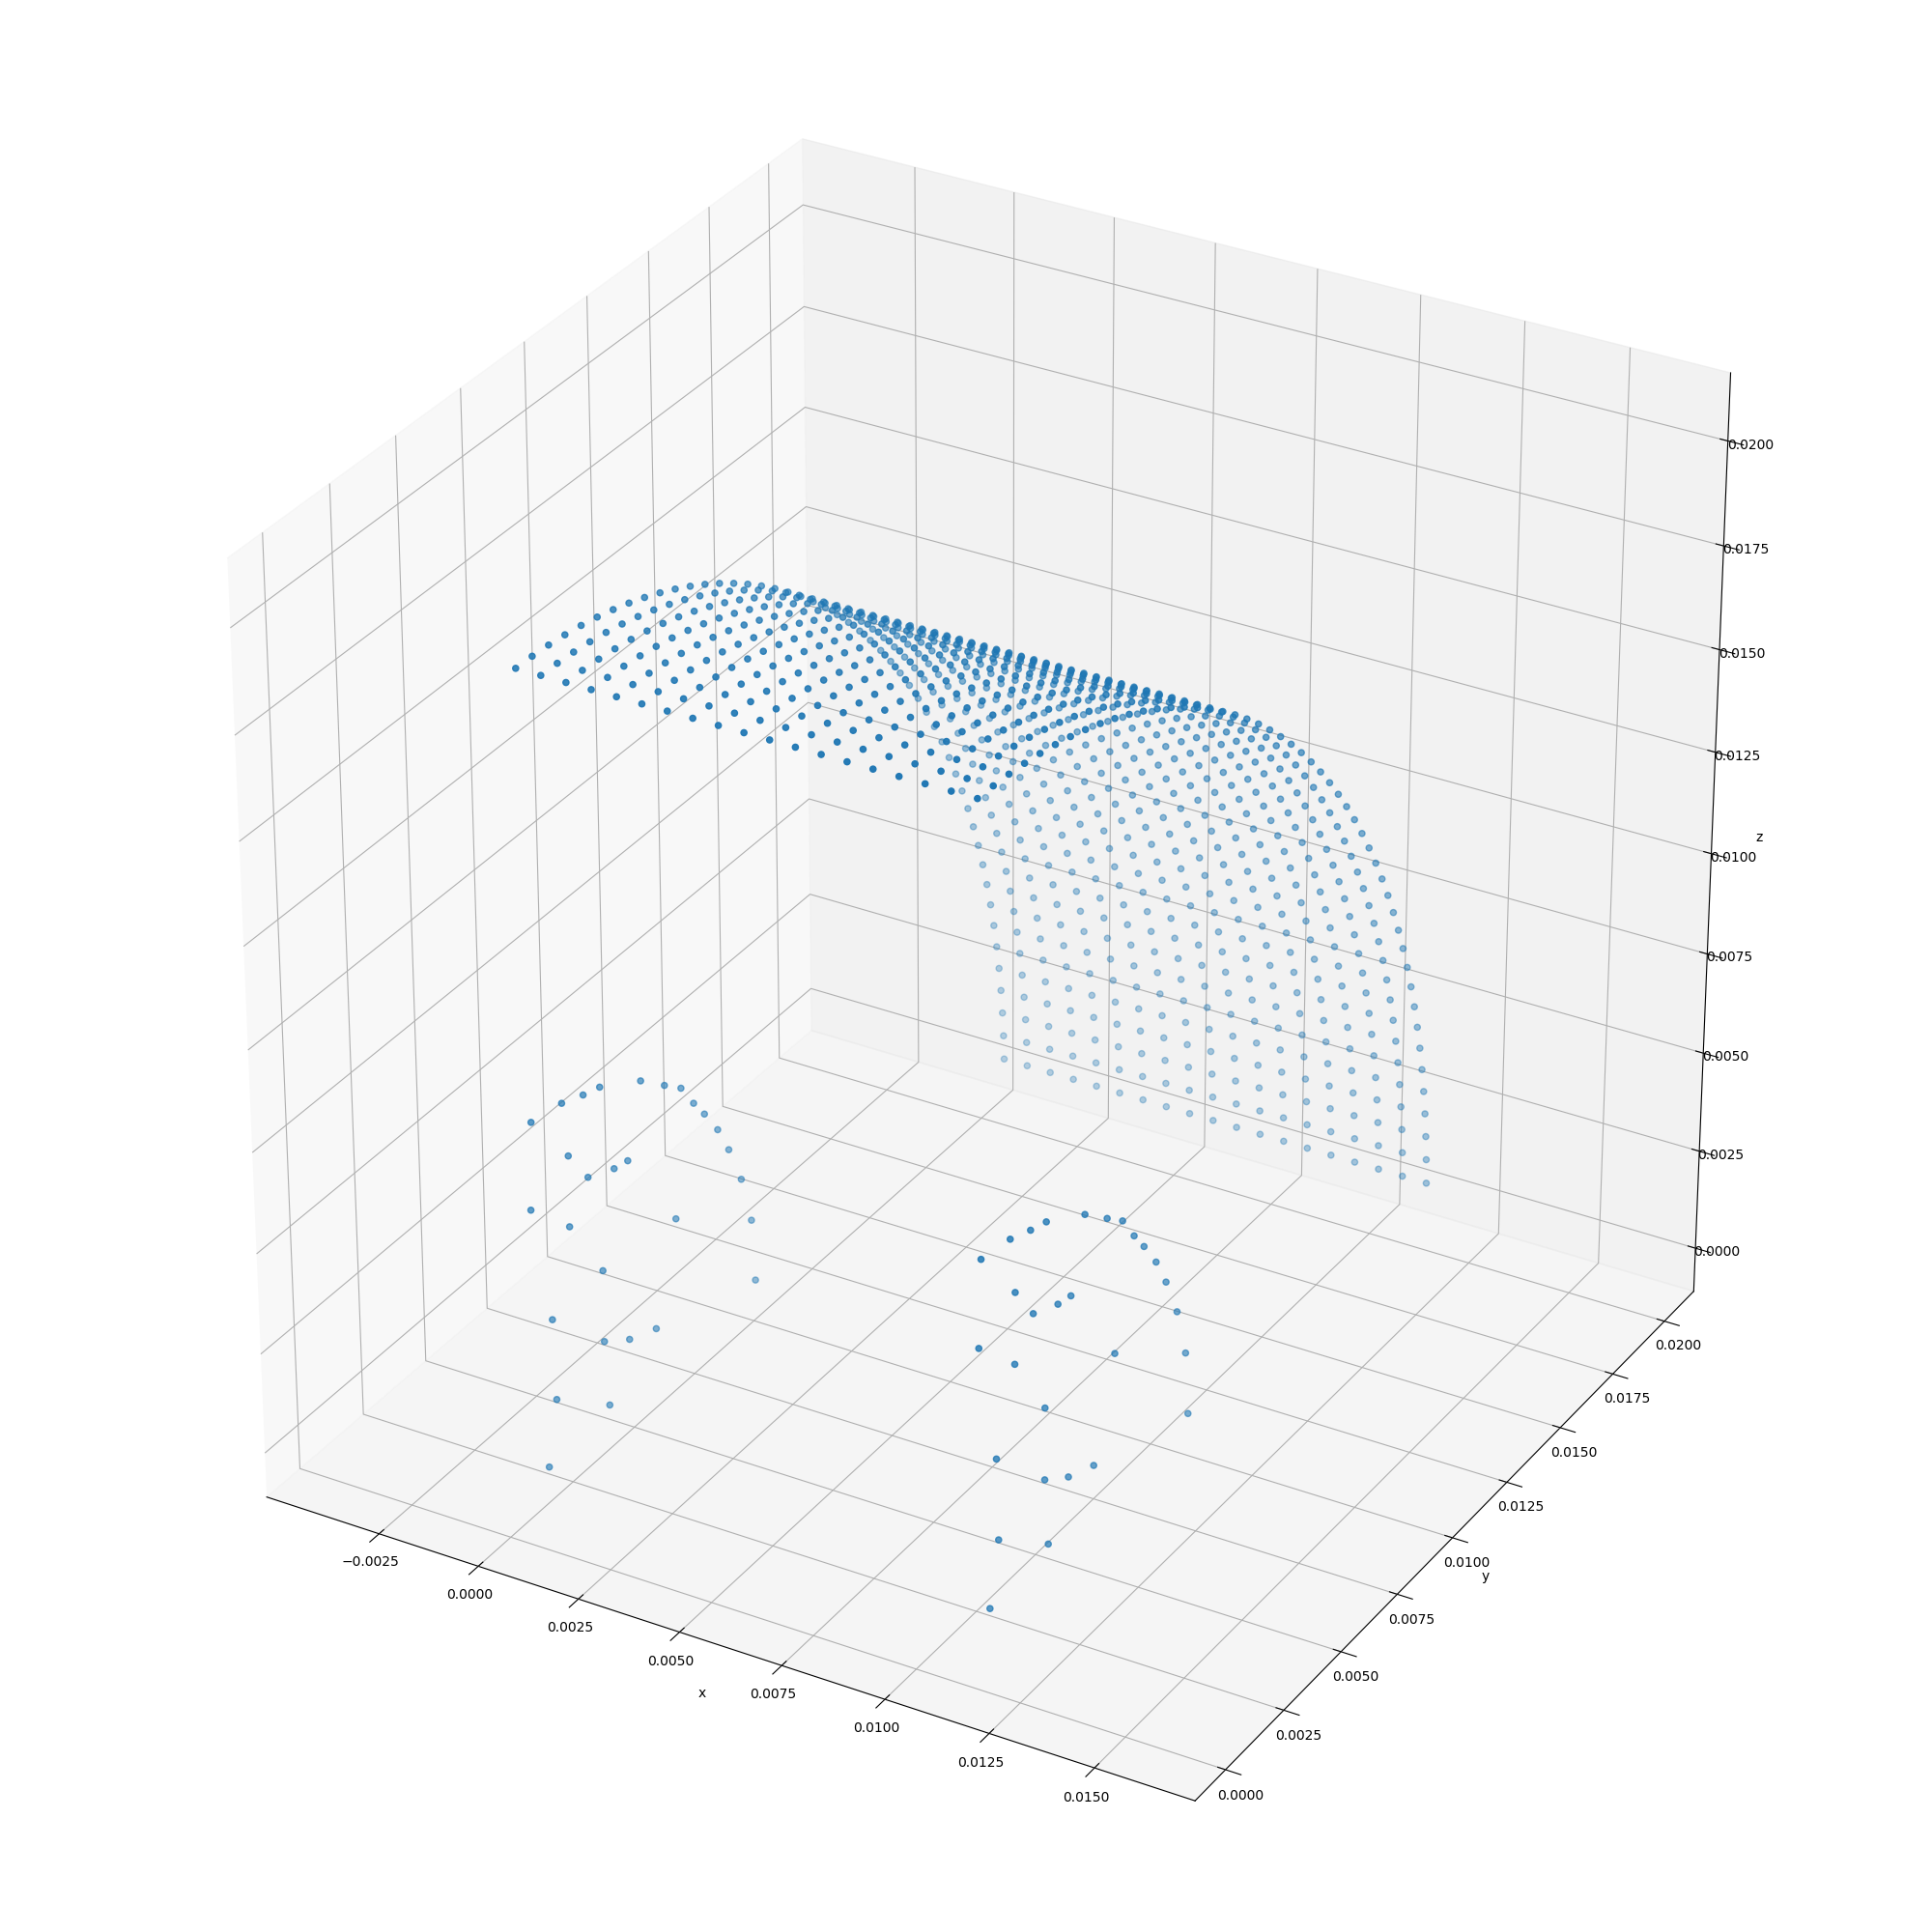

In [69]:
EdaTools.plot_3d(
    Utils.nodes_to_coord_array(
        result_d3plot.get_nodeByID(nodes_dic), timestep=0))

In [38]:
time_step = 0

# TODO We only need to consider the surface nodes
extractor = Utils.SurfaceNodeIds(threshold=20)
node_ids_surface = extractor.fit_transform(result_d3plot)
nodes_surface = result_d3plot.get_nodeByID(
    list(node_ids_surface)
)

nodes_surface

In [47]:
# TODO get the co-ordinated of the surface nodes
cords_surface = Utils.nodes_to_coord_array(nodes_surface, timestep=time_step)

# TODO determine the bounding coordinates for each dimension
x_coord_range = (cords_surface[:, 0].min(), cords_surface[:, 0].max())
y_coord_range = (cords_surface[:, 1].min(), cords_surface[:, 1].max())
z_coord_range = (cords_surface[:, 2].min(), cords_surface[:, 2].max())

# TODO find the center of the node coords
y_center = (y_coord_range[1] + y_coord_range[0]) / 2
z_center = (z_coord_range[1] + z_coord_range[0]) / 2

In [58]:
# TODO iterate over each surface node and extract only those that are in
#  the posictive y-z quadrant and not on the top or bottom x surfaces
node_ids_observed = []
for node in nodes_surface:
    x_coord, y_coord, z_coord = node.get_coords()[time_step]
    # check that the noded is not on the top or bottom
    if x_coord_range[1] > x_coord > x_coord_range[0]:
        # # check positive y-z quadrant
        # if y_coord > y_center and z_coord > z_center:
        node_ids_observed.append(node.get_id())

In [63]:
z_center

0.0

# TODO


* Fit a model to this data 
* create a second model with lower mesh density to represent the simulation 
* Map the 'DIC' data to the 'FEM' for a best fit.
